# Audio Spectrum

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

## Load and Play Audio File

In [15]:
file_path = 'sweet n sour.mp3'
y, sr = librosa.load(file_path)
Audio(file_path)

## Waveform Visualization

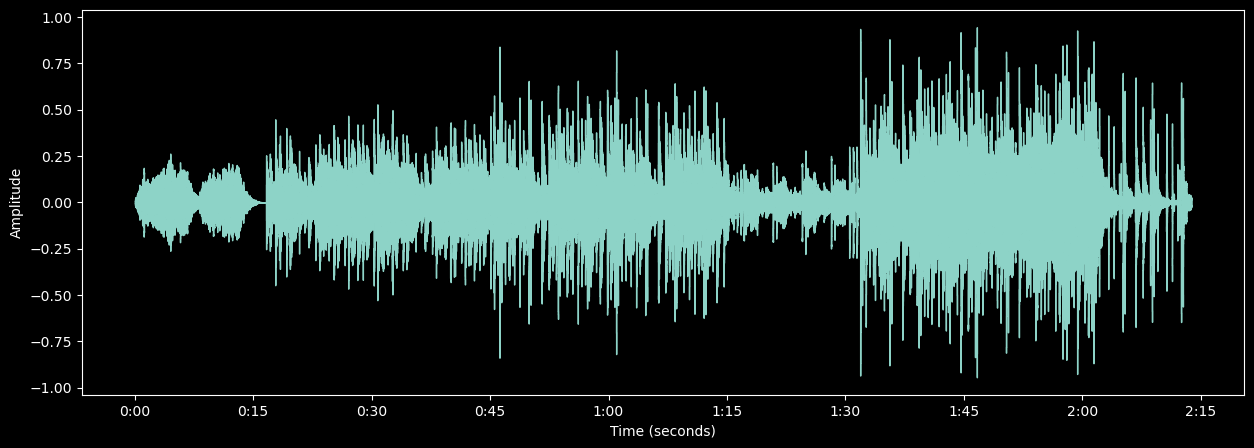

In [22]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Spectrogram Analysis

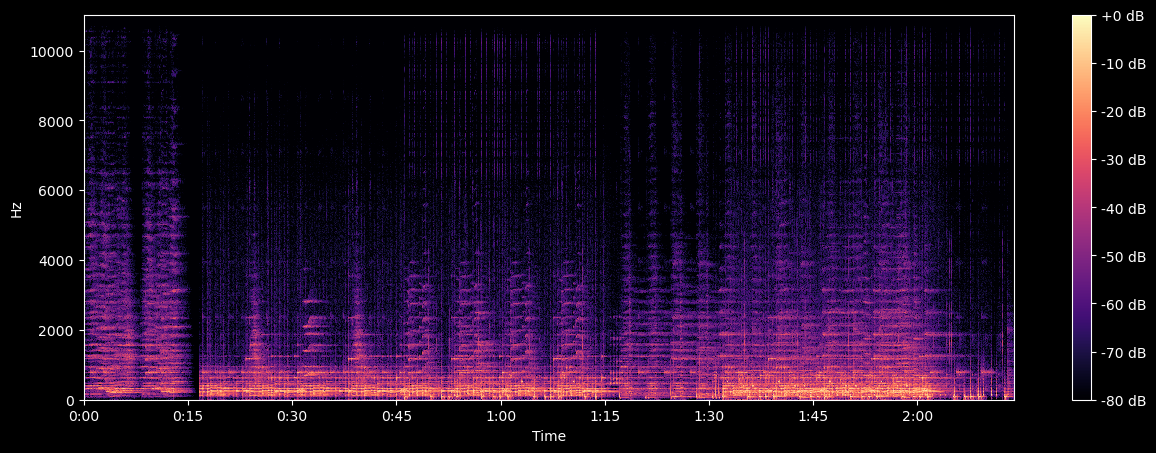

In [26]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#plot spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.show()

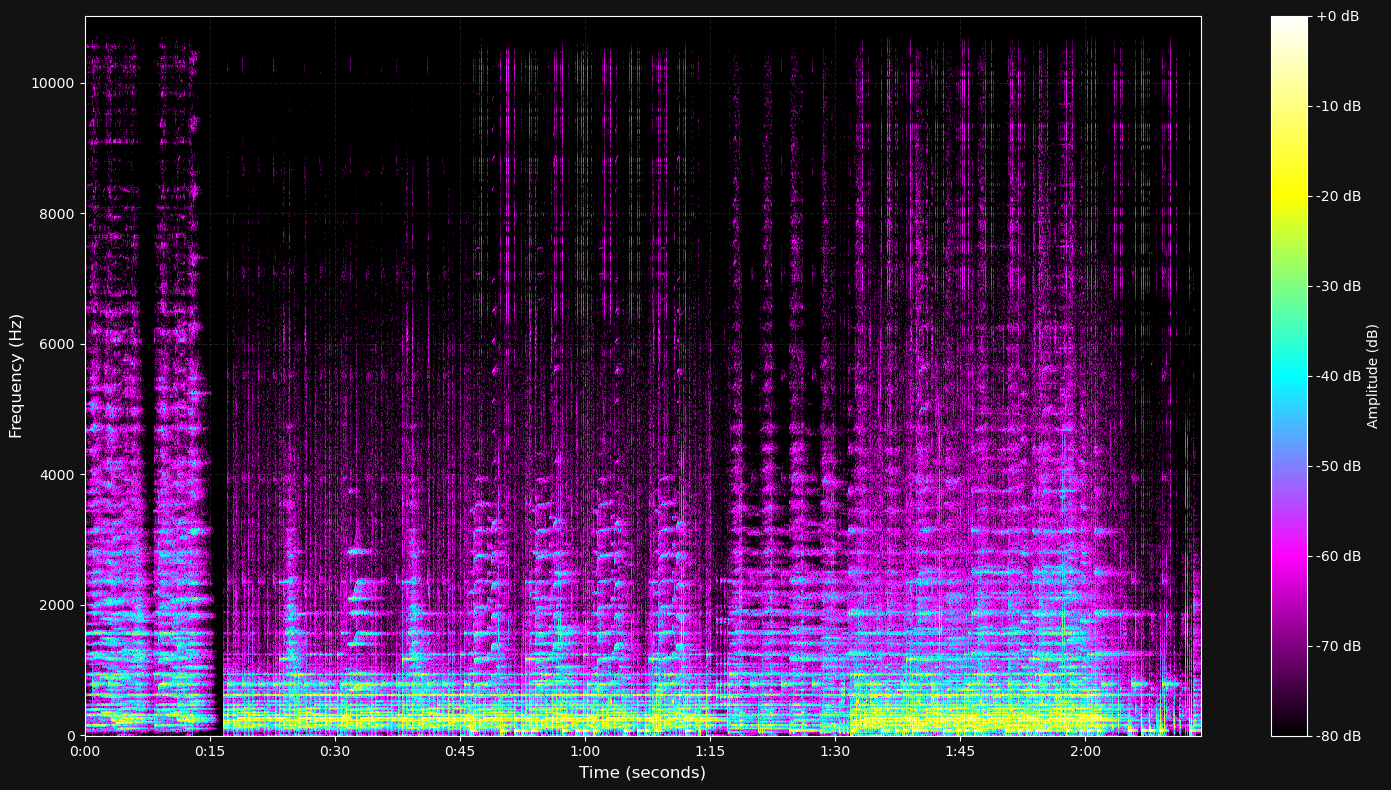

In [25]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

from matplotlib.colors import LinearSegmentedColormap
colors = ['#000000', '#FF00FF', '#00FFFF', '#FFFF00', '#FFFFFF']
n_bins = 1000
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#121212')
ax.set_facecolor('#121212')

img = librosa.display.specshow(
    S_db, 
    sr=sr, 
    x_axis='time', 
    y_axis='hz',
    cmap=custom_cmap,
    ax=ax
)

#glowing effect
for i in range(3):
    librosa.display.specshow(
        S_db,
        sr=sr,
        x_axis='time',
        y_axis='hz',
        cmap=custom_cmap,
        alpha=0.1 * (3-i),
        ax=ax
    )

# color bar
cbar = plt.colorbar(img, format='%+2.0f dB')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.set_ylabel('Amplitude (dB)', color='white')

#title and labels
ax.set_xlabel('Time (seconds)', color='white', fontsize=12)
ax.set_ylabel('Frequency (Hz)', color='white', fontsize=12)

#ticks
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

#grid
ax.grid(True, color='white', alpha=0.1, linestyle='--')

plt.tight_layout()
plt.show()

## Mel Spectrogram
better represents how humans perceive sound frequencies

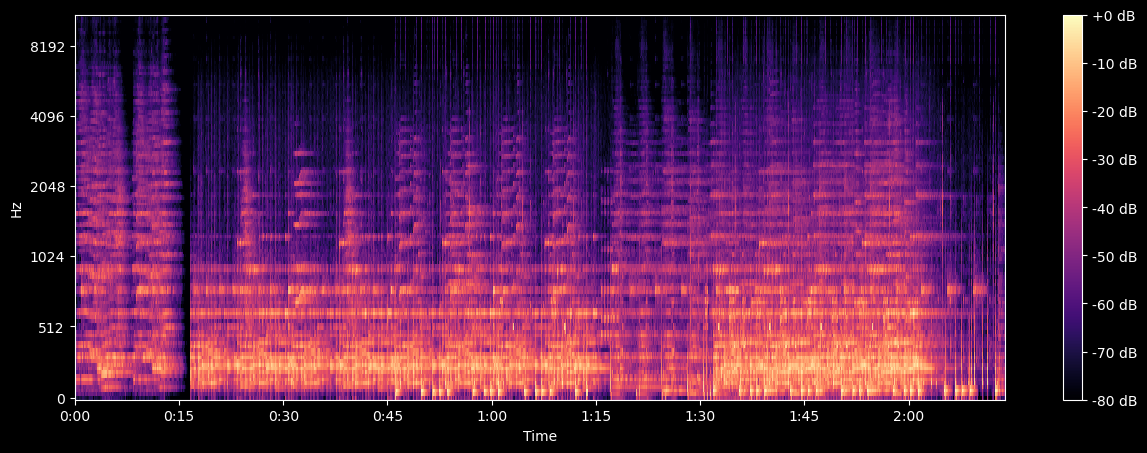

In [27]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db = librosa.power_to_db(mel_spect, ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Chromagram

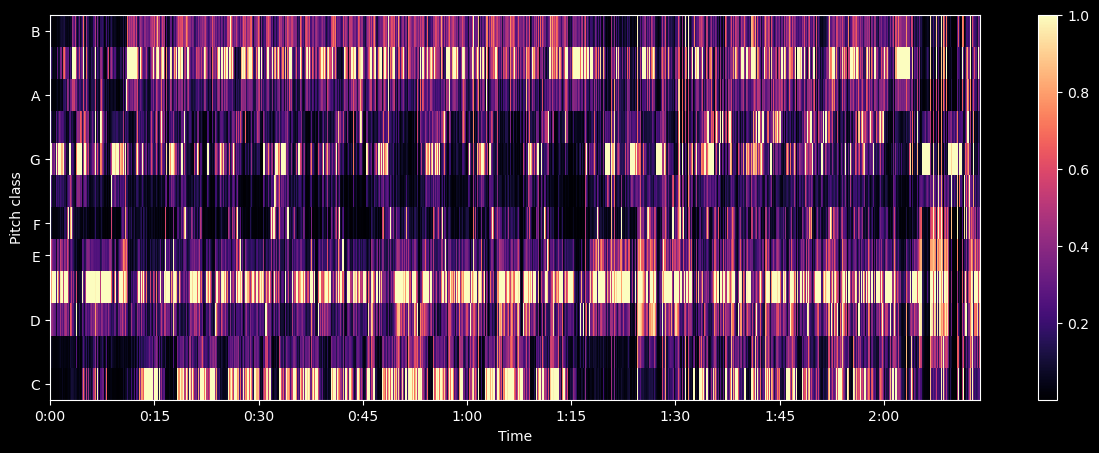

In [14]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.show()